<a href="https://colab.research.google.com/github/Pritijondhale97/Deep_Learning/blob/main/Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclass Classification

In [2]:
path = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_train%20(1).csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Target feature: Price range
0   cheap
1   Good price
2   Expensive


perform basic data quality checks
# New section

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.shape

(2000, 21)

In [5]:
#check for missing data
df.isna().sum()


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [6]:
df.duplicated().sum()

np.int64(0)

There are no missing values nor any duplicated data present in this dataset
# New section

Separate X and Y features

In [7]:
df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
X = df.drop(columns=["price_range"])
Y = df[["price_range"]]


In [9]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [11]:
X.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


# Data Preprocessing and Data cleaning

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [14]:


num_pipe = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler()).set_output(transform="pandas")

In [15]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
# New section

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


# Perform train test split

In [17]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=42)


In [18]:
xtrain.shape


(1600, 20)

In [19]:
xtest.shape

(400, 20)

Preprocess Y data

In [21]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [22]:
ytrain_cat

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

# Model building using Keras

In [23]:

from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping


In [24]:
ytrain_cat.shape


(1600, 4)

In [25]:
# Initialize the model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Dense layer(hidden layer)
model.add(Dense(units=64,activation="relu"))

# Add the Dropout layer
model.add(Dropout(rate=0.3))

# Add the Dense layer(hidden layer)
model.add(Dense(units=32,activation="relu"))

# Add the Dropout layer
model.add(Dropout(rate=0.15))

# Add the Dense layer(hidden layer)
model.add(Dense(units=ytrain_cat.shape[1],activation="softmax"))


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from warnings import filterwarnings
filterwarnings('ignore')


In [28]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])



In [29]:
es = EarlyStopping(monitor="val_loss",patience=10)


In [30]:

hist = model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3052 - loss: 1.4176 - val_accuracy: 0.4844 - val_loss: 1.2217
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4055 - loss: 1.2580 - val_accuracy: 0.5781 - val_loss: 1.0816
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5196 - loss: 1.0876 - val_accuracy: 0.6344 - val_loss: 0.9323
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5889 - loss: 0.9413 - val_accuracy: 0.6875 - val_loss: 0.8066
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6305 - loss: 0.8402 - val_accuracy: 0.7625 - val_loss: 0.7020
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6392 - loss: 0.7923 - val_accuracy: 0.7875 - val_loss: 0.6224
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6931 - loss: 0.6856 - val_accuracy: 0.8156 - val_loss: 0.5563
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7425 - loss: 0.6085 - val_accuracy: 0.8188 - 

Learning curve

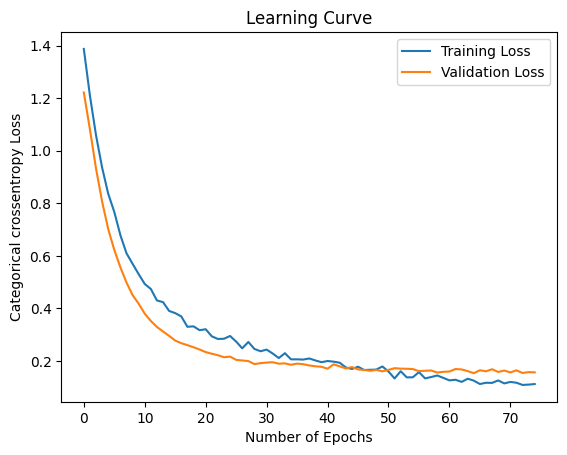

In [31]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Categorical crossentropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Evaluate the model

In [32]:
model.evaluate(xtrain,ytrain_cat)



50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0294


[0.05167745053768158, 0.9868749976158142]

In [33]:

model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9338 - loss: 0.1352


[0.15422716736793518, 0.925000011920929]

# Predictions

In [34]:
ypred_test = model.predict(xtest)
ypred_test[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[9.9598408e-01, 4.0159095e-03, 6.9023405e-11, 3.9742184e-26],
       [9.1446677e-12, 1.7317180e-03, 9.9767607e-01, 5.9219776e-04],
       [8.9179212e-03, 9.9058306e-01, 4.9906428e-04, 6.5214374e-14],
       [8.5526291e-30, 8.8665325e-15, 1.1451996e-03, 9.9885476e-01],
       [5.7162277e-05, 9.7118992e-01, 2.8753005e-02, 4.9781512e-09]],
      dtype=float32)

In [35]:
import numpy as np
np.max(ypred_test,axis=1)


array([0.9959841 , 0.9976761 , 0.99058306, 0.99885476, 0.9711899 ,
       0.9933123 , 0.9057512 , 0.9963553 , 0.96382684, 0.91238576,
       0.9871852 , 0.78679967, 0.9989987 , 0.9999435 , 0.696058  ,
       0.58405477, 0.99955076, 0.9999318 , 0.998679  , 0.9962669 ,
       0.99727875, 0.84063506, 0.50258344, 0.9955004 , 0.9988483 ,
       0.97647446, 0.9520729 , 0.75875884, 0.9897412 , 0.9993789 ,
       0.9743751 , 0.99989986, 0.99772865, 0.9666513 , 0.9800274 ,
       0.9928058 , 0.99789774, 0.98591936, 0.9998642 , 0.94403744,
       0.8633295 , 0.9579288 , 0.952062  , 0.9990288 , 0.5886416 ,
       0.7416641 , 0.9892046 , 0.9887411 , 0.9987796 , 0.99809843,
       0.99997497, 0.99714535, 0.998483  , 0.9988587 , 0.75895226,
       0.9679804 , 0.99055   , 0.9780122 , 0.99974126, 0.9998286 ,
       0.786168  , 0.9999138 , 0.99628615, 0.9909161 , 0.99766207,
       0.89477444, 0.99986255, 0.9998648 , 0.9960311 , 0.98255986,
       0.95697683, 0.8762539 , 0.99956745, 0.99868304, 0.98701

In [36]:
ypred_test_final = np.argmax(ypred_test,axis=1)
ypred_test_final


array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 2,
       0, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 1, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 2, 2,
       3, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [37]:
ypred_test_final[:5]

array([0, 2, 1, 3, 1])

In [38]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


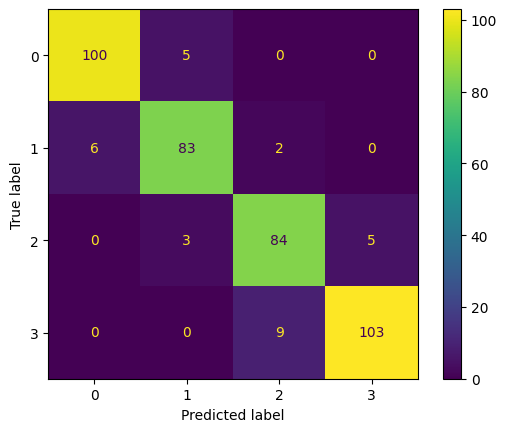

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_test_final)
ConfusionMatrixDisplay(cf).plot()

In [40]:

from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test_final))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.91      0.91      0.91        91
           2       0.88      0.91      0.90        92
           3       0.95      0.92      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



# Save the model for final out of sample predictions

In [41]:
model.save("Mobile predictions.keras")


In [42]:
from keras.models import load_model

In [43]:
m1 = load_model('/content/Mobile predictions.keras')
m1.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [44]:
path2 = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_test%20(1).csv"
xnew = pd.read_csv(path2)
xnew.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [45]:
xnew = xnew.drop(columns=["id"])
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [46]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.050473,1.010051,0.463042,-1.019184,-0.992890,0.957886,1.210147,-0.006069,0.840642,1.084046,1.168355,-0.002497,-0.783435,-0.002963,0.402047,0.512708,0.730240,0.559641,0.994018,-1.014099
996,-1.432976,-0.990050,0.340463,0.981177,-0.992890,-1.043966,-1.049904,1.381165,1.292737,-0.227564,-1.305750,1.142498,0.880565,-0.176321,-1.022389,-1.094526,1.462493,-1.786861,0.994018,0.986097
997,-0.121824,-0.990050,-0.149853,-1.019184,-0.762495,0.957886,-1.325520,-0.006069,-1.702391,-1.539175,0.343653,-0.378903,-0.987096,-0.831024,-1.734608,-1.324131,0.547176,0.559641,-1.006018,-1.014099
998,0.670330,1.010051,-1.253064,0.981177,-0.992890,-1.043966,0.989655,-0.352878,0.868898,-1.101971,0.343653,-1.368378,-0.970895,0.354819,0.639453,1.201522,-0.917331,-1.786861,0.994018,-1.014099


In [47]:
final_preds = m1.predict(xnew_pre)
final_preds[:10]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[2.8354072e-22, 2.8504663e-10, 6.6652137e-01, 3.3347863e-01],
       [3.0927929e-31, 2.7510048e-14, 6.2621976e-03, 9.9373782e-01],
       [8.2066369e-17, 1.0231657e-06, 8.6433750e-01, 1.3566145e-01],
       [1.7670556e-39, 1.2611803e-19, 5.9017279e-05, 9.9994099e-01],
       [1.5463466e-04, 9.8415309e-01, 1.5692292e-02, 5.7056040e-09],
       [2.2149889e-26, 5.8922429e-12, 1.3477922e-02, 9.8652202e-01],
       [2.1019477e-44, 1.5349966e-21, 8.0682203e-06, 9.9999189e-01],
       [1.2887814e-04, 9.9931920e-01, 5.5192719e-04, 1.1826046e-10],
       [5.9809536e-25, 4.6454385e-12, 4.9551120e-03, 9.9504495e-01],
       [9.9900657e-01, 9.9350105e-04, 3.5128749e-12, 2.6469627e-31]],
      dtype=float32)

In [48]:
final_price = np.argmax(final_preds,axis=1)
final_price[:10]



array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0])

Save the predictions to dataframe and then save the results

# New section

In [49]:

xnew["Price Range"] = final_price
xnew.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,2
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [50]:
xnew.to_csv("PriceRange Results.csv")
